In [1]:
from csv import DictReader
import collections
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")
import matplotlib.pyplot as plt
import operator
import numpy as np

data = list(DictReader(open('podatki/pn2019.csv', 'rt', encoding='utf-8'), delimiter=";"))

### Število nesreč, kjer je povzročitelj pijan

Procent nesrec, kjer je povzročitelj pijan (nad 0.5 promila): 6.30410237109522 %
Procent nesrec s smrtno zrtvijo: 0.48247706908435395 %
Procent nesrec s smrtno zrtvijo pri nesrecah, kjer je povzrocitelj pijan: 0.199203187250996 %


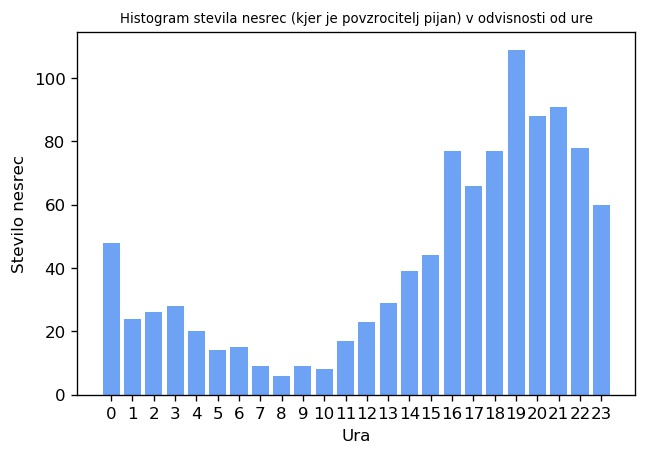

In [102]:
nesrece_poskodbe = dict()
smrtne_nesrece = 0
smrt_drunk_driver = 0
drunk_driver = 0
for row in data:
    idPN = int(row["ZaporednaStevilkaPN"])
    if idPN not in nesrece_poskodbe.keys():
        nesrece_poskodbe[idPN] = [list(), False]
    nesrece_poskodbe[idPN][0].append(row["PoskodbaUdelezenca"])
    alkotest = float("0" + row["VrednostAlkotesta"].replace(",", "."))
    if row["Povzrocitelj"] == "POVZROCITELJ":
        if alkotest > 0.5:
            nesrece_poskodbe[idPN][1] = True
for key, value in nesrece_poskodbe.items():
    if value[1]:
        drunk_driver += 1
    if "SMRT" in value[0]:
        smrtne_nesrece += 1
        if value[1]:
            smrt_drunk_driver += 1

vsi = 0
pijani = 0
ure_nesrec = dict()
for row in data:
    ura = int(row["UraPN"])
    alkotest = float("0" + row["VrednostAlkotesta"].replace(",", "."))
    if row["Povzrocitelj"] == "POVZROCITELJ":
        if alkotest > 0.5:
            pijani += 1
            if ura not in ure_nesrec.keys():
                ure_nesrec[ura] = 0
            ure_nesrec[ura] += 1
        vsi += 1;

s = sorted(ure_nesrec.keys())
ure_nesrec_sorted = dict()
for i in s:
    ure_nesrec_sorted[i] = ure_nesrec.get(i)

print("Procent nesrec, kjer je povzročitelj pijan (nad 0.5 promila):", pijani/vsi * 100, "%")
print("Procent nesrec s smrtno zrtvijo:", smrtne_nesrece/len(nesrece_poskodbe) * 100, "%")
print("Procent nesrec s smrtno zrtvijo pri nesrecah, kjer je povzrocitelj pijan:", smrt_drunk_driver/drunk_driver * 100, "%")

plt.figure(dpi = 120)
plt.bar(ure_nesrec_sorted.keys(), ure_nesrec_sorted.values(), color="#6ea2f5");
plt.title("Histogram stevila nesrec (kjer je povzrocitelj pijan) v odvisnosti od ure", fontsize=8)
plt.xlabel("Ura");
plt.xticks(s)
plt.ylabel("Stevilo nesrec");

### Zakaj se je zgodila nesreča (vzrok)

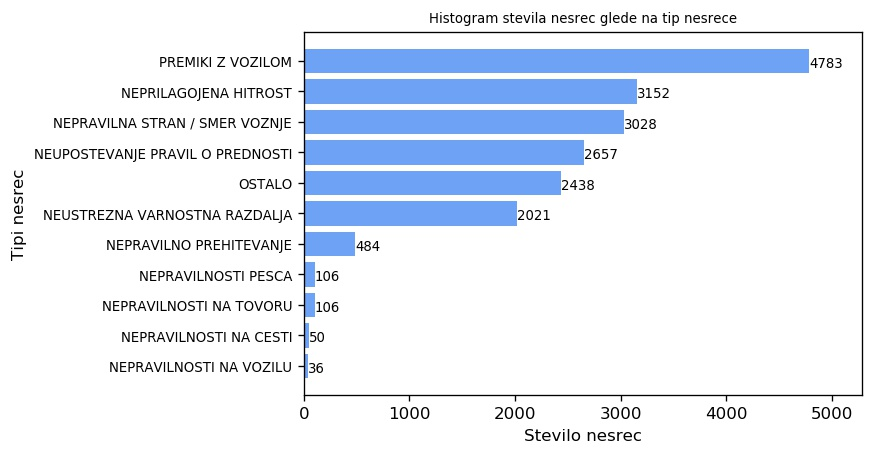

In [3]:
prejsnja = -1
trenutna = -1
vzroki = dict()
for row in data:
    trenutna = int(row["ZaporednaStevilkaPN"])
    if trenutna == prejsnja:
        continue
    vzrok = row["VzrokNesrece"]
    if vzrok not in vzroki.keys():
        vzroki[vzrok] = 1
    else:
        vzroki[vzrok] += 1
    prejsnja = trenutna

vzroki = sorted(vzroki.items(), key=operator.itemgetter(1))
x = [i[0] for i in vzroki]
y = [i[1] for i in vzroki]
plt.figure(dpi = 120);
plt.barh(x, y, color="#6ea2f5");
plt.title('Histogram stevila nesrec glede na tip nesrece', fontsize=8);
plt.xlabel('Stevilo nesrec');
plt.ylabel('Tipi nesrec');
plt.xlim(0, y[-1] + 500)
plt.yticks(fontsize=8);
for i, v in enumerate(y):
    plt.text(v, i - 0.20, str(v), color="black", fontsize=8)

### Smrti glede na vzrok nesreče

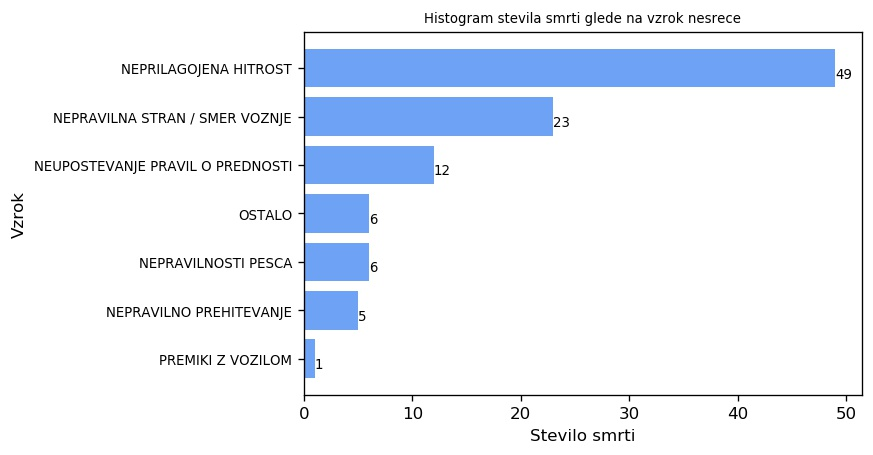

In [4]:
smrti = 0
vsi = 0
vzroki_smrti = dict()

for row in data:
    if row["PoskodbaUdelezenca"] == "SMRT":
        if row["VzrokNesrece"] not in vzroki_smrti.keys():
            vzroki_smrti[row["VzrokNesrece"]] = 0
        vzroki_smrti[row["VzrokNesrece"]] += 1
        
vzroki_smrti_sorted = sorted(vzroki_smrti.items(), key=operator.itemgetter(1))
x = [i[0] for i in vzroki_smrti_sorted]
y = [i[1] for i in vzroki_smrti_sorted]
        
plt.figure(dpi = 120);
plt.barh(x, y, color="#6ea2f5");
plt.title("Histogram stevila smrti glede na vzrok nesrece", fontsize=8)
plt.xlabel('Stevilo smrti');
plt.ylabel('Vzrok');
plt.yticks(fontsize=8);
for i, v in enumerate(y):
    plt.text(v, i - 0.20, str(v), color="black", fontsize=8)

### Število povzročenih nesreč glede na staž izpita

In [5]:
def pearson(x, y):
    return np.mean(((x - np.mean(x))*(y-np.mean(y)))/(np.std(x)*np.std(y)))

Stevilo izpuscenih vrstic: 8542
Pearsonov koeficient: -0.9504443990473436
MSE: 1832.3218952409165


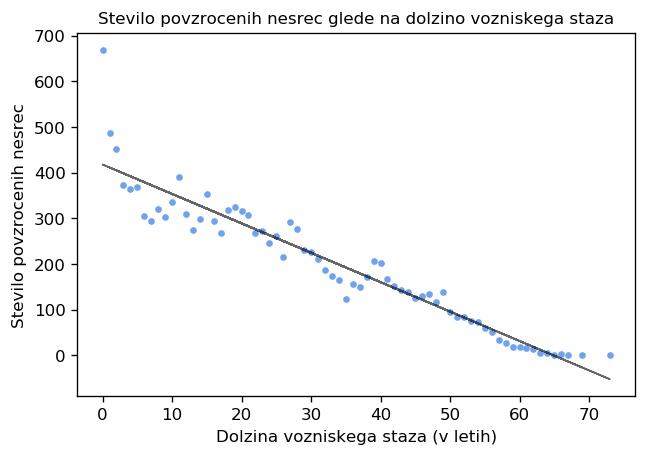

In [110]:
staz_nesrece = dict()
st_izpuscenih = 0

for row in data:
    if int(row["VozniskiStazVLetih"]) == 0 and int(row["VozniskiStazVMesecih"]) == 0:
        st_izpuscenih += 1
        continue
    if row["Povzrocitelj"] == "POVZROCITELJ":
        staz = int(row["VozniskiStazVLetih"])
        if staz not in staz_nesrece.keys():
            staz_nesrece[staz] = 0
        staz_nesrece[staz] += 1
        
plt.figure(dpi=120)
plt.plot(list(staz_nesrece.keys()), list(staz_nesrece.values()), ".", color="#6ea2f5")
plt.title('Stevilo povzrocenih nesrec glede na dolzino vozniskega staza', fontsize=10)
plt.xlabel('Dolzina vozniskega staza (v letih)')
plt.ylabel('Stevilo povzrocenih nesrec');

print("Stevilo izpuscenih vrstic:", st_izpuscenih)
print("Pearsonov koeficient:", pearson(list(staz_nesrece.keys()), list(staz_nesrece.values())))

# Regresija
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from math import sqrt

x = np.array(list(staz_nesrece.keys()))
y = np.array(list(staz_nesrece.values()))
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)

predict = model.predict(x)
plt.plot(x, predict, color='black', linewidth="1", alpha=0.6);
print("MSE:", mean_squared_error(predict, y))

#### Brez izpuščenih vrstic

Pearsonov koeficient: -0.5316958289221361
MSE: 87851.76775170672


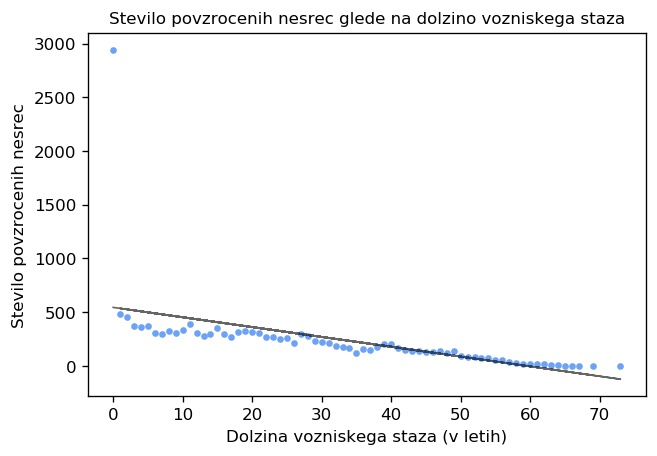

In [109]:
staz_nesrece = dict()

for row in data:
    if row["Povzrocitelj"] == "POVZROCITELJ":
        staz = int(row["VozniskiStazVLetih"])
        if staz not in staz_nesrece.keys():
            staz_nesrece[staz] = 0
        staz_nesrece[staz] += 1
        
plt.figure(dpi=120)
plt.plot(list(staz_nesrece.keys()), list(staz_nesrece.values()), ".", color="#6ea2f5")
plt.title('Stevilo povzrocenih nesrec glede na dolzino vozniskega staza', fontsize=10)
plt.xlabel('Dolzina vozniskega staza (v letih)')
plt.ylabel('Stevilo povzrocenih nesrec');

print("Pearsonov koeficient:", pearson(list(staz_nesrece.keys()), list(staz_nesrece.values())))

# Regresija
x = np.array(list(staz_nesrece.keys()))
y = np.array(list(staz_nesrece.values()))
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)

predict = model.predict(x)
plt.plot(x, predict, color='black', linewidth="1", alpha=0.6);
print("MSE:", mean_squared_error(predict, y))

In [8]:
koordinate_datum = dict()
koordinate_datum_smrti = dict()
prejsnja = -1
trenutna = -1
for row in data:
    trenutna = int(row["ZaporednaStevilkaPN"])
    if row["PoskodbaUdelezenca"] == "SMRT":
        datum = int(row["DatumPN"][3:5])
        if datum not in koordinate_datum_smrti.keys():
            koordinate_datum_smrti[datum] = list()
        koordinate_datum_smrti[datum].append((int(row["GeoKoordinataX"]), int(row["GeoKoordinataY"])))
        prejsnja = trenutna
        continue
    if trenutna == prejsnja or (int(row["GeoKoordinataX"]) == 0 and int(row["GeoKoordinataY"]) == 0):
        prejsnja = trenutna
        continue
    datum = int(row["DatumPN"][3:5])
    if datum not in koordinate_datum.keys():
        koordinate_datum[datum] = list()
    koordinate_datum[datum].append((int(row["GeoKoordinataX"]), int(row["GeoKoordinataY"])))
    prejsnja = trenutna
for key, value in koordinate_datum.items():
    print(key, value[:3])
    
for key, value in koordinate_datum_smrti.items():
    print(key, value[:3])

1 [(101505, 464773), (110757, 456269), (120860, 547660)]
2 [(148872, 414828), (44237, 400788), (112183, 471517)]
3 [(151760, 556163), (170698, 582890), (170832, 547345)]
4 [(160747, 598755), (112846, 451625), (144305, 426225)]
7 [(186928, 595061), (133646, 389565), (105127, 471822)]
5 [(92538, 386768), (156919, 601027), (75257, 441043)]
6 [(100546, 464405), (134593, 532788), (99097, 473936)]
8 [(190121, 593262), (113884, 447435), (117790, 532715)]
9 [(113860, 456395), (52210, 417347), (45544, 403963)]
10 [(99515, 520215), (153710, 550136), (153184, 552640)]
11 [(122217, 545264), (118664, 559557), (56302, 524043)]
12 [(122497, 451501), (81898, 483128), (172099, 554487)]
1 [(117847, 404163), (108416, 505959), (64698, 504403)]
2 [(66330, 424512), (158427, 501496), (120531, 521020)]
3 [(121088, 451729), (120182, 495096), (120182, 495096)]
4 [(115468, 533828), (98479, 434590), (123570, 387903)]
5 [(118596, 530697), (46238, 404958), (139876, 514096)]
6 [(127322, 388429), (127322, 388429), (1

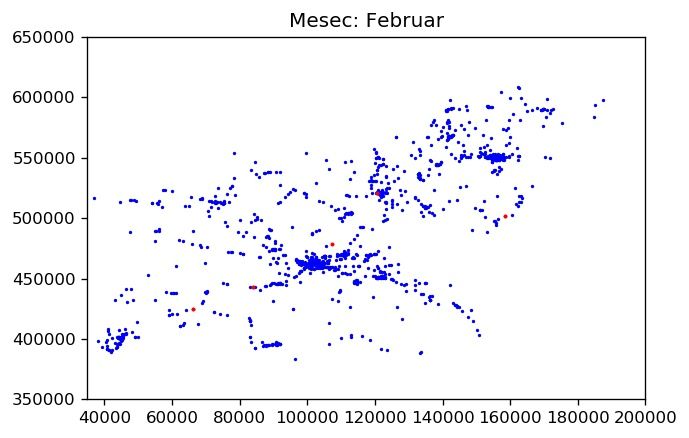

In [9]:
x = [x[0] for x in koordinate_datum[2]]
y = [x[1] for x in koordinate_datum[2]]
x_smrti = [x[0] for x in koordinate_datum_smrti[2]]
y_smrti = [x[1] for x in koordinate_datum_smrti[2]]

fig = plt.figure(dpi = 120);
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, s=1, c="blue");
ax1.scatter(x_smrti, y_smrti, s=2, c="red");
plt.ylim(350000, 650000)
plt.xlim(35000, 200000)
#plt.xticks([], " ");
#plt.yticks([], " ");
plt.title("Mesec: Februar" );
plt.savefig('koordinate nesrec/smrt_feb.png');

### Clustering

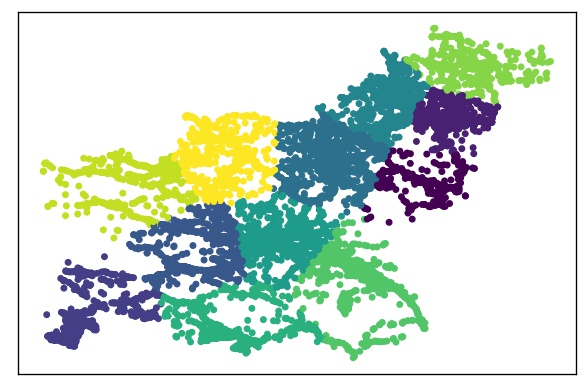

In [10]:
from scipy.cluster.vq import kmeans2, whiten

prejsnja = -1
trenutna = -1
koordinate = list()
for row in data:
    trenutna = int(row["ZaporednaStevilkaPN"])
    if prejsnja == trenutna or int(row["GeoKoordinataX"]) == 0 or int(row["GeoKoordinataY"]) == 0:
        continue
    koordinate.append((int(row["GeoKoordinataX"]), int(row["GeoKoordinataY"])))
    prejsnja = trenutna
    
koordinate_arr = np.array(koordinate)

# K-means Clustering
x, y = kmeans2(whiten(koordinate_arr), 12, iter = 100)  
plt.figure(dpi=120);
plt.scatter(koordinate_arr[:,0], koordinate_arr[:,1], c=y, s=10);
plt.xticks([])
plt.yticks([])
plt.show()

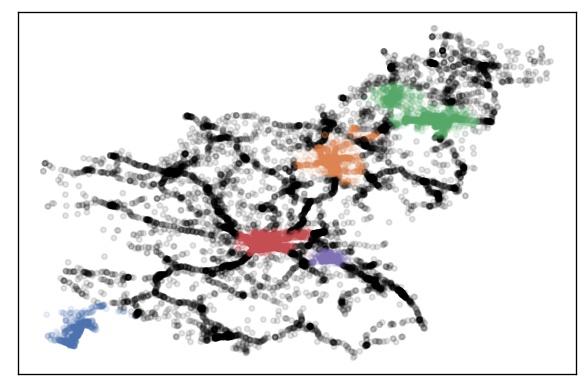

In [11]:
import hdbscan
import seaborn as sns
import sklearn.cluster as cluster

clusterer = hdbscan.HDBSCAN(min_cluster_size=500)
labels = clusterer.fit_predict(koordinate_arr)
palette = sns.color_palette('deep', np.unique(labels).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
plt.figure(dpi=120)
plt.scatter(koordinate_arr.T[0], koordinate_arr.T[1], c=colors, s=10, alpha=0.1)
plt.xticks([])
plt.yticks([])
plt.show();

### Klasifikacija

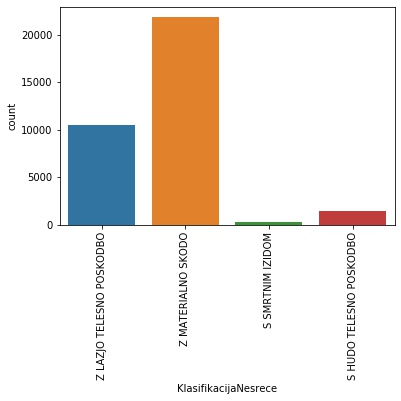

,KlasifikacijaNesrece,UpravnaEnotaStoritve,DatumPN,UraPN,VNaselju,Lokacija,VrstaCesteNaselja,OpisKraja,VzrokNesrece,TipNesrece,...,StanjePrometa,StanjeVozisca,VrstaVozisca,Povzrocitelj,Starost,Spol,UEStalnegaPrebivalisca,PoskodbaUdelezenca,VrstaUdelezenca,UporabaVarnostnegaPasu
0,Z LAZJO TELESNO POSKODBO,LJUBLJANA,08.01.2019,13,DA,NASELJE,NASELJE Z ULICNIM SISTEMOM,KRIZISCE,NEUSTREZNA VARNOSTNA RAZDALJA,TRCENJE V STOJECE / PARKIRANO VOZILO,...,GOST,MOKRO,ZGLAJEN ASFALT / BETON,UDELEZENEC,50,MOSKI,LJUBLJANA,BREZ POSKODBE,VOZNIK OSEBNEGA AVTOMOBILA,DA
1,Z LAZJO TELESNO POSKODBO,LJUBLJANA,08.01.2019,13,DA,NASELJE,NASELJE Z ULICNIM SISTEMOM,KRIZISCE,NEUSTREZNA VARNOSTNA RAZDALJA,TRCENJE V STOJECE / PARKIRANO VOZILO,...,GOST,MOKRO,ZGLAJEN ASFALT / BETON,POVZROCITELJ,22,ZENSKI,POSTOJNA,LAZJA TELESNA POSKODBA,VOZNIK OSEBNEGA AVTOMOBILA,DA
2,Z LAZJO TELESNO POSKODBO,LJUBLJANA,02.01.2019,5,DA,NASELJE,NASELJE BREZ ULICNEGA SISTEMA,CESTA,NEPRILAGOJENA HITROST,CELNO TRCENJE,...,REDEK,SPOLZKO,HRAPAV ASFALT / BETON,POVZROCITELJ,47,ZENSKI,LJUBLJANA,BREZ POSKODBE,VOZNIK OSEBNEGA AVTOMOBILA,DA
3,Z LAZJO TELESNO POSKODBO,LJUBLJANA,02.01.2019,5,DA,NASELJE,NASELJE BREZ ULICNEGA SISTEMA,CESTA,NEPRILAGOJENA HITROST,CELNO TRCENJE,...,REDEK,SPOLZKO,HRAPAV ASFALT / BETON,UDELEZENEC,78,MOSKI,LJUBLJANA,LAZJA TELESNA POSKODBA,VOZNIK OSEBNEGA AVTOMOBILA,DA
4,Z MATERIALNO SKODO,SMARJE PRI JELSAH,01.01.2019,4,DA,NASELJE,NASELJE BREZ ULICNEGA SISTEMA,CESTA,NEPRILAGOJENA HITROST,BOCNO TRCENJE,...,REDEK,MOKRO,ZGLAJEN ASFALT / BETON,POVZROCITELJ,44,MOSKI,SMARJE PRI JELSAH,BREZ POSKODBE,VOZNIK OSEBNEGA AVTOMOBILA,DA


In [64]:
import pandas as pd

nesrece = pd.read_csv('podatki/pn2019.csv', sep=";")
nesrece = nesrece.drop(["ZaporednaStevilkaPN", "SifraCesteNaselja", "Drzavljanstvo", "GeoKoordinataX", "GeoKoordinataY", "VozniskiStazVLetih", "VozniskiStazVMesecih", "VrednostAlkotesta", "TekstCesteNaselja", "TekstOdsekaUlice", "SifraOdsekaUlice", "StacionazaDogodka", "ZaporednaStevilkaOsebeVPN", "VrednostStrokovnegaPregleda,,,,"], axis=1)

dataset = nesrece.values
# Prikaz podatkov
import seaborn as sns
sns.countplot(nesrece['KlasifikacijaNesrece'],label="Count")
plt.xticks(rotation=90)
plt.show();

nesrece.head()

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

X = dataset[:,1:]
y = dataset[:,0]

X = X.astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

def select_features_chi(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=6)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs

def select_features_mutual(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k=6)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Model zgrajen na vseh atributih
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)
yhat = model.predict(X_test_enc)
accuracy = accuracy_score(y_test_enc, yhat)
print('Točnost na vseh podatkih: %.2f' % (accuracy*100))

# Model zgrajen na Chi s k=6
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

X_train_fs, X_test_fs = select_features_chi(X_train_enc, y_train_enc, X_test_enc)
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)
yhat = model.predict(X_test_fs)
accuracy = accuracy_score(y_test_enc, yhat)
print('Točnost na CHI top 6 podatkih: %.2f' % (accuracy*100))

# Model zgrajen na Mutual info s k=6
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

X_train_fs, X_test_fs = select_features_mutual(X_train_enc, y_train_enc, X_test_enc)
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)
yhat = model.predict(X_test_fs)
accuracy = accuracy_score(y_test_enc, yhat)
print('Točnost na Mutual info top 6 podatkih: %.2f' % (accuracy*100))

Točnost na vseh podatkih: 82.83
Točnost na CHI top 6 podatkih: 82.70
Točnost na Mutual info top 6 podatkih: 82.68
